**<h3>Import required libraries</h3>**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle

**<h2>1. Load the Dataset</h2>**


In [ ]:
df=pd.read_csv("http://raw.githubusercontent.com/wajdi-22/kidney_disease/main/data.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.02,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.02,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df = shuffle(df,random_state=42)
df.shape

(400, 26)

In [ ]:
# Check out the  dataset
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
209,210,19,70,1.02,0,0,?,normal,notpresent,notpresent,...,?,6900,?,no,no,no,good,no,no,ckd
280,281,47,80,?,?,?,?,?,notpresent,notpresent,...,52,8100,5.2,no,no,no,good,no,no,notckd
33,34,60,100,1.02,2,0,abnormal,abnormal,notpresent,notpresent,...,29,?,?,yes,no,no,poor,no,no,ckd
210,211,59,100,1.015,4,2,normal,normal,notpresent,notpresent,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
93,94,73,100,1.01,3,2,abnormal,abnormal,present,notpresent,...,30,7000,3.2,yes,yes,yes,poor,no,no,ckd


**<h2>2. Preprocessing</h2>**


In [ ]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
#check duplicated values
df.duplicated(keep=False).sum()

0

In [ ]:
#check null values
df = df.replace('?',np.nan)
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wbcc              106
rbcc              131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 209 to 102
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    int64 
 1   age             391 non-null    object
 2   bp              388 non-null    object
 3   sg              353 non-null    object
 4   al              354 non-null    object
 5   su              351 non-null    object
 6   rbc             248 non-null    object
 7   pc              335 non-null    object
 8   pcc             396 non-null    object
 9   ba              396 non-null    object
 10  bgr             356 non-null    object
 11  bu              381 non-null    object
 12  sc              383 non-null    object
 13  sod             313 non-null    object
 14  pot             312 non-null    object
 15  hemo            348 non-null    object
 16  pcv             329 non-null    object
 17  wbcc            294 non-null    object
 18  rbcc    

In [ ]:
num_cols = ['age','bp','rbcc','bgr','bu','sc','sod','pot','hemo','pcv','wbcc']

In [ ]:
df[num_cols]=df[num_cols].apply(pd.to_numeric, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 209 to 102
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    object 
 4   al              354 non-null    object 
 5   su              351 non-null    object 
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wbcc            294 non-null    f

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

sg has ['1.02' nan '1.015' '1.01' '1.025' '1.005'] values

al has ['0' nan '2' '4' '3' '1' '5'] values

su has ['0' nan '2' '4' '3' '5' '1'] values

rbc has [nan 'abnormal' 'normal'] values

pc has ['normal' nan 'abnormal'] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['no' 'yes' nan] values

dm has ['no' 'yes' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'notckd'] values



In [ ]:
df=df.fillna(df.mean())

<ipython-input-17-6f8c6f28e805>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
209,210,19.0,70.0,1.02,0,0,NaN,normal,notpresent,notpresent,...,38.884498,6900.000000,4.707435,no,no,no,good,no,no,ckd
280,281,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,52.000000,8100.000000,5.200000,no,no,no,good,no,no,notckd
33,34,60.0,100.0,1.02,2,0,abnormal,abnormal,notpresent,notpresent,...,29.000000,8406.122449,4.707435,yes,no,no,poor,no,no,ckd
210,211,59.0,100.0,1.015,4,2,normal,normal,notpresent,notpresent,...,20.000000,9800.000000,3.900000,yes,yes,yes,good,no,yes,ckd
93,94,73.0,100.0,1.01,3,2,abnormal,abnormal,present,notpresent,...,30.000000,7000.000000,3.200000,yes,yes,yes,poor,no,no,ckd


In [ ]:
df.describe()

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,16.974966,13.476298,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,1.000000,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.750000,42.000000,70.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,200.500000,54.000000,78.234536,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,300.250000,64.000000,80.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,400.000000,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
#2. Call function to impute most occured category
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for Columns in cat_cols:
    impute_nan_most_frequent_category(df,Columns)
    

#3. Drop actual columns
df = df.drop(cat_cols, axis = 1)

In [ ]:
#formatting dataframe by replacing strings in it
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd' : 1.0,
    'notckd' : 0.0
}
df = df.replace(replacements)
df=df.apply(pd.to_numeric, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 209 to 102
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      400 non-null    int64  
 1   age                     400 non-null    float64
 2   bp                      400 non-null    float64
 3   bgr                     400 non-null    float64
 4   bu                      400 non-null    float64
 5   sc                      400 non-null    float64
 6   sod                     400 non-null    float64
 7   pot                     400 non-null    float64
 8   hemo                    400 non-null    float64
 9   pcv                     400 non-null    float64
 10  wbcc                    400 non-null    float64
 11  rbcc                    400 non-null    float64
 12  sg_Imputed              400 non-null    float64
 13  al_Imputed              400 non-null    int64  
 14  su_Imputed              400 non-null    

In [ ]:
df=df.drop(columns=["id"])
y = df['classification_Imputed']
x = df.loc[:, df.columns != 'classification_Imputed']
x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')


In [ ]:
x1=x
y1=y
x=x.values

y=y.values

In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset and split it into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Feature scaling
ss=MinMaxScaler()
train_fitted_ss =ss.fit(X_train)
X_train_scaled = train_fitted_ss.transform(X_train)
X_test_scaled = train_fitted_ss.transform(X_test)
X_train_scaled

array([[0.525     , 0.44444444, 0.72222222, ..., 1.        , 0.        ,
        0.        ],
       [0.4       , 0.22222222, 0.12820513, ..., 1.        , 0.        ,
        0.        ],
       [0.6875    , 0.22222222, 0.14102564, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.6375    , 0.55555556, 0.2991453 , ..., 0.        , 1.        ,
        0.        ],
       [0.675     , 0.22222222, 0.30555556, ..., 1.        , 0.        ,
        0.        ],
       [0.55      , 0.22222222, 0.16452991, ..., 1.        , 0.        ,
        0.        ]])

**<h1>Model fitting<h1>**

**SVM**

In [ ]:
ayoub_model = SVC(kernel='linear',random_state=42)
ayoub_model.fit(X_train_scaled,y_train)


SVC(kernel='linear', random_state=42)

**KNN**

**choice of k for KNN**

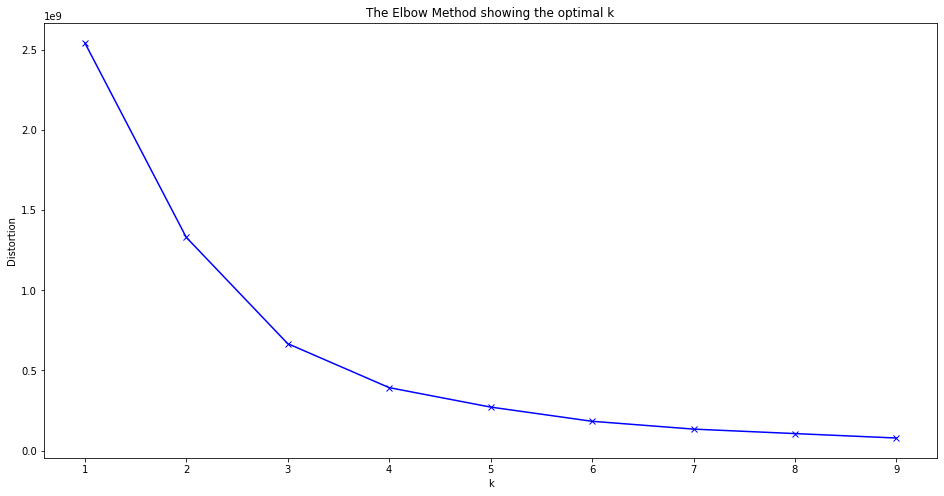

In [ ]:
#elbow method
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
rabeb_model=KNeighborsClassifier(n_neighbors=3)
rabeb_model.fit(X_train_scaled,y_train)
print(accuracy_score(y_test, rabeb_model.predict(X_test_scaled)))

0.9666666666666667


**Decision Tree**

In [ ]:
salah_model = DecisionTreeClassifier(random_state = 42)
salah_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Random Forest**

In [ ]:
karim_model = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 10,random_state=42)
karim_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10, random_state=42)

**<h1>Model evaluation without feature selection<h1>**

In [ ]:
# # Evaluate the model on the train set
# accuracy_train = ayoub_model.score(X_train_scaled, y_train)
# print('Accuracy on train:', accuracy_train)

# # Evaluate the model on the test set
# accuracy_test = ayoub_model.score(X_test_scaled, y_test)
# print('Accuracy on train:', accuracy_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, ayoub_model.predict(X_test_scaled)))
print(accuracy_score(y_test, salah_model.predict(X_test)))
print(accuracy_score(y_test, karim_model.predict(X_test)))
print(accuracy_score(y_test, rabeb_model.predict(X_test_scaled)))

0.9833333333333333
0.9833333333333333
0.975
0.9666666666666667


In [ ]:
from sklearn.metrics import classification_report
print(f"""Classification Report :\n
\033[1;31mSVM \033[
\n {classification_report(y_test, ayoub_model.predict(X_test_scaled))}
\033[1;31mKNN\033[ 
\n {classification_report(y_test, rabeb_model.predict(X_test_scaled))}
\033[1;31mDecision Tree\033[
\n {classification_report(y_test, salah_model.predict(X_test))}
\033[1;31mRandom Forest\033[
\n {classification_report(y_test, karim_model.predict(X_test))}""")


Classification Report :

SVM [

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        42
         1.0       1.00      0.97      0.99        78

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

KNN[ 

               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        42
         1.0       1.00      0.95      0.97        78

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120

Decision Tree[

               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        42
         1.0       0.99      0.99      0.99        78

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg 

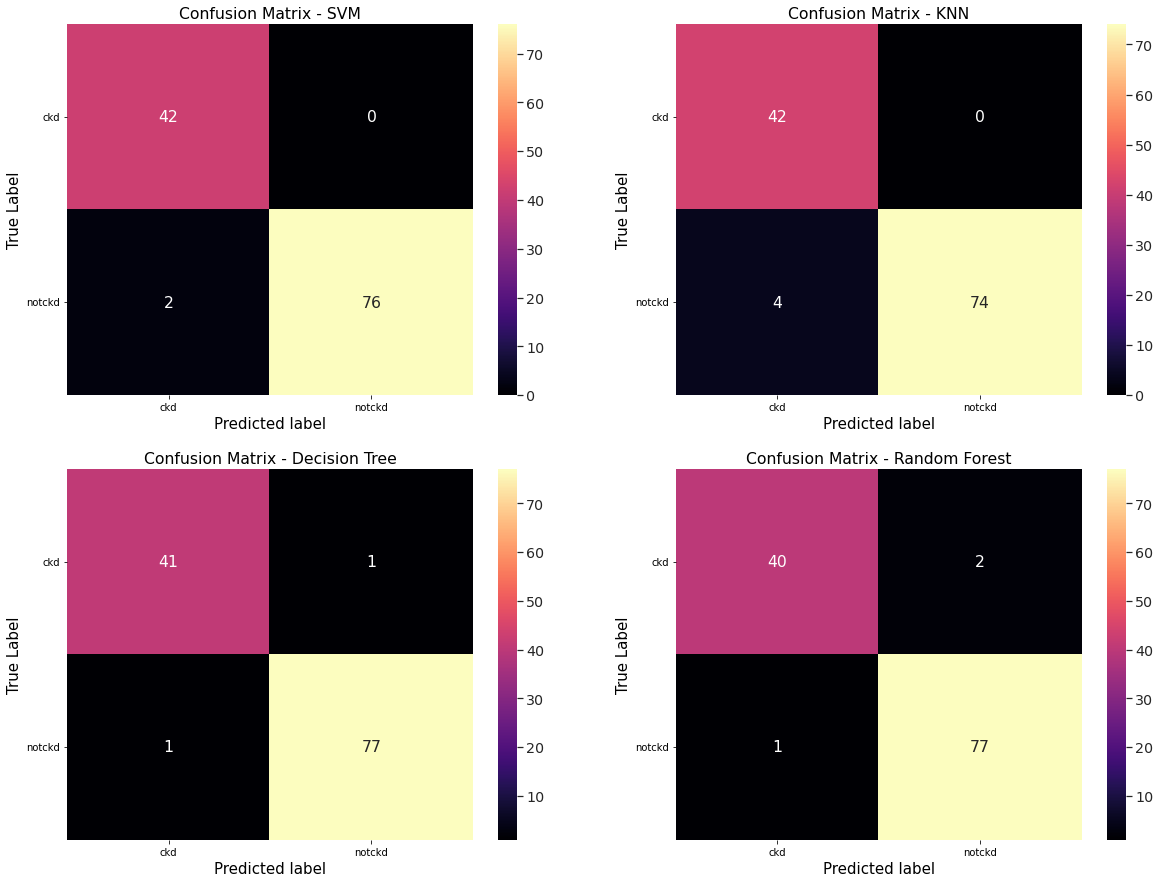

In [ ]:
from sklearn import metrics

confusion_matrix1 = metrics.confusion_matrix(y_test, ayoub_model.predict(X_test_scaled))
matrix_df1 = pd.DataFrame(confusion_matrix1)

confusion_matrix2 = metrics.confusion_matrix(y_test, rabeb_model.predict(X_test_scaled))
matrix_df2 = pd.DataFrame(confusion_matrix2)

confusion_matrix3 = metrics.confusion_matrix(y_test, salah_model.predict(X_test))
matrix_df3 = pd.DataFrame(confusion_matrix3)

confusion_matrix4 = metrics.confusion_matrix(y_test, karim_model.predict(X_test))
matrix_df4 = pd.DataFrame(confusion_matrix4)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Plot the first confusion matrix
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=axs[0,0], cmap="magma")
axs[0,0].set_title('Confusion Matrix - SVM')
axs[0,0].set_xlabel("Predicted label", fontsize =15)
axs[0,0].set_xticklabels(["ckd","notckd"])
axs[0,0].set_ylabel("True Label", fontsize=15)
axs[0,0].set_yticklabels(["ckd","notckd"], rotation = 0)


# # Repeat for the second and third confusion matrices
sns.set(font_scale=1.3)
sns.heatmap(matrix_df2, annot=True, fmt="g", ax=axs[0,1], cmap="magma")
axs[0,1].set_title('Confusion Matrix - KNN')
axs[0,1].set_xlabel("Predicted label", fontsize =15)
axs[0,1].set_xticklabels(["ckd","notckd"])
axs[0,1].set_ylabel("True Label", fontsize=15)
axs[0,1].set_yticklabels(["ckd","notckd"], rotation = 0)

sns.set(font_scale=1.3)
sns.heatmap(matrix_df3, annot=True, fmt="g", ax=axs[1,0], cmap="magma")
axs[1,0].set_title('Confusion Matrix - Decision Tree')
axs[1,0].set_xlabel("Predicted label", fontsize =15)
axs[1,0].set_xticklabels(["ckd","notckd"])
axs[1,0].set_ylabel("True Label", fontsize=15)
axs[1,0].set_yticklabels(["ckd","notckd"], rotation = 0)

sns.set(font_scale=1.3)
sns.heatmap(matrix_df4, annot=True, fmt="g", ax=axs[1,1], cmap="magma")
axs[1,1].set_title('Confusion Matrix - Random Forest')
axs[1,1].set_xlabel("Predicted label", fontsize =15)
axs[1,1].set_xticklabels(["ckd","notckd"])
axs[1,1].set_ylabel("True Label", fontsize=15)
axs[1,1].set_yticklabels(["ckd","notckd"], rotation = 0)

# Show the plot
plt.show()


**<h2>1. Feature Selection</h2>**


Optimal number of features : 9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


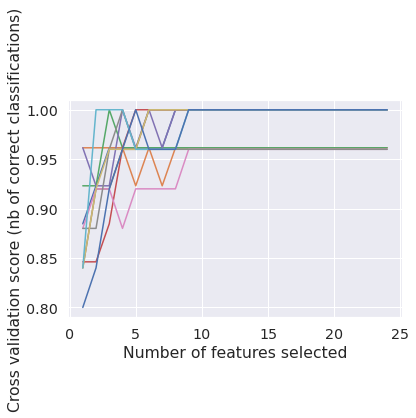

[False False False False False False False  True  True False  True  True
  True False False False False False  True  True False  True  True False]


In [ ]:
from sklearn.model_selection import StratifiedKFold
#rfecv for classification
svc = SVC(kernel="linear", random_state=42)
rfecv = RFECV(estimator=svc,cv=StratifiedKFold(11))
rfecv.fit(X_train_scaled, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
selected_columns = rfecv.support_
print(selected_columns)

In [ ]:
# chosen_columns0 = ['pcc_Imputed','sod','hemo','pcv','htn_Imputed','dm_Imputed','appet_Imputed','pe_Imputed']

chosen_columns = np.where(selected_columns)[0]
print(chosen_columns)
print(f'number of chosen columns: {len(chosen_columns)}')

[ 7  8 10 11 12 18 19 21 22]
number of chosen columns: 9


In [ ]:
X_train_selected = X_train[:,chosen_columns]
X_test_selected = X_test[:,chosen_columns]
X_train_scaled_selected = X_train_scaled[:,chosen_columns]
X_test_scaled_selected = X_test_scaled[:,chosen_columns]

**<h1>Model fitting to selected features:<h1>**

**SVM**

In [ ]:
ayoub_modelS = SVC(kernel='linear',random_state=42, probability = True)
ayoub_modelS.fit(X_train_scaled_selected,y_train)


SVC(kernel='linear', probability=True, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
rabeb_model=KNeighborsClassifier(n_neighbors=1)
rabeb_model.fit(X_train_scaled_selected,y_train)
print(accuracy_score(y_test, rabeb_model.predict(X_test_scaled_selected)))

0.9833333333333333


**Decision Tree**

In [ ]:
salah_modelS = DecisionTreeClassifier(random_state = 42)
salah_modelS.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

**Random Forest**

In [ ]:
karim_modelS = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 10,random_state=42)
karim_modelS.fit(X_train_selected, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10, random_state=42)

**<h1>Model evaluation with feature selection<h1>**

In [ ]:
# # Evaluate the model on the train set
# accuracy_train = ayoub_model.score(X_train_scaled, y_train)
# print('Accuracy on train:', accuracy_train)

# # Evaluate the model on the test set
# accuracy_test = ayoub_model.score(X_test_scaled, y_test)
# print('Accuracy on train:', accuracy_test)

In [ ]:
print(accuracy_score(y_test, ayoub_modelS.predict(X_test_scaled_selected)))
print(accuracy_score(y_test, salah_modelS.predict(X_test_selected)))
print(accuracy_score(y_test, karim_modelS.predict(X_test_selected)))
print(accuracy_score(y_test, rabeb_model.predict(X_test_scaled_selected)))

0.975
0.9916666666666667
0.9916666666666667
0.9833333333333333


In [ ]:
from sklearn.metrics import classification_report
print(f"""Classification Report :
\n\033[1;31mSVM\033[
\n {classification_report(y_test, ayoub_modelS.predict(X_test_scaled_selected))}
\033[1;31mKNN\033[ 
\n {classification_report(y_test, rabeb_model.predict(X_test_scaled_selected))}
\033[1;31mDecision Tree\033[ 
\n {classification_report(y_test, salah_modelS.predict(X_test_selected))}
\033[1;31mRandom Forest\033[
\n {classification_report(y_test, karim_modelS.predict(X_test_selected))}""")


Classification Report :

SVM[

               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        42
         1.0       1.00      0.96      0.98        78

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

KNN[ 

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        42
         1.0       1.00      0.97      0.99        78

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

Decision Tree[ 

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        42
         1.0       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg 

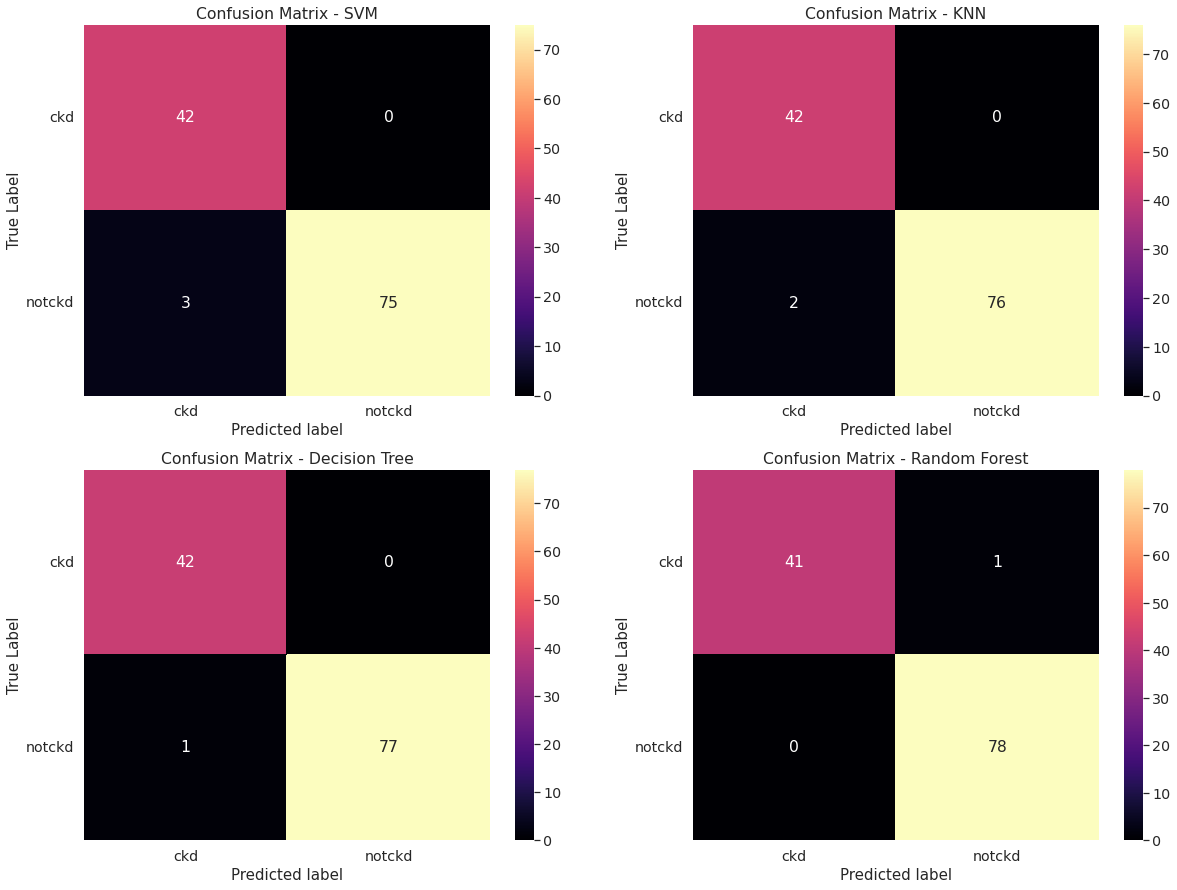

In [ ]:
from sklearn import metrics

confusion_matrix1 = metrics.confusion_matrix(y_test, ayoub_modelS.predict(X_test_scaled_selected))
matrix_df1 = pd.DataFrame(confusion_matrix1)

confusion_matrix2 = metrics.confusion_matrix(y_test, rabeb_model.predict(X_test_scaled_selected))
matrix_df2 = pd.DataFrame(confusion_matrix2)

confusion_matrix3 = metrics.confusion_matrix(y_test, salah_modelS.predict(X_test_selected))
matrix_df3 = pd.DataFrame(confusion_matrix3)

confusion_matrix4 = metrics.confusion_matrix(y_test, karim_modelS.predict(X_test_selected))
matrix_df4 = pd.DataFrame(confusion_matrix4)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Plot the first confusion matrix
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=axs[0,0], cmap="magma")
axs[0,0].set_title('Confusion Matrix - SVM')
axs[0,0].set_xlabel("Predicted label", fontsize =15)
axs[0,0].set_xticklabels(["ckd","notckd"])
axs[0,0].set_ylabel("True Label", fontsize=15)
axs[0,0].set_yticklabels(["ckd","notckd"], rotation = 0)


# # Repeat for the second and third confusion matrices
sns.set(font_scale=1.3)
sns.heatmap(matrix_df2, annot=True, fmt="g", ax=axs[0,1], cmap="magma")
axs[0,1].set_title('Confusion Matrix - KNN')
axs[0,1].set_xlabel("Predicted label", fontsize =15)
axs[0,1].set_xticklabels(["ckd","notckd"])
axs[0,1].set_ylabel("True Label", fontsize=15)
axs[0,1].set_yticklabels(["ckd","notckd"], rotation = 0)

sns.set(font_scale=1.3)
sns.heatmap(matrix_df3, annot=True, fmt="g", ax=axs[1,0], cmap="magma")
axs[1,0].set_title('Confusion Matrix - Decision Tree')
axs[1,0].set_xlabel("Predicted label", fontsize =15)
axs[1,0].set_xticklabels(["ckd","notckd"])
axs[1,0].set_ylabel("True Label", fontsize=15)
axs[1,0].set_yticklabels(["ckd","notckd"], rotation = 0)

sns.set(font_scale=1.3)
sns.heatmap(matrix_df4, annot=True, fmt="g", ax=axs[1,1], cmap="magma")
axs[1,1].set_title('Confusion Matrix - Random Forest')
axs[1,1].set_xlabel("Predicted label", fontsize =15)
axs[1,1].set_xticklabels(["ckd","notckd"])
axs[1,1].set_ylabel("True Label", fontsize=15)
axs[1,1].set_yticklabels(["ckd","notckd"], rotation = 0)

# Show the plot
plt.show()

[Text(0.6153846153846154, 0.95, 'hemo <= 12.95\ngini = 0.474\nsamples = 280\nvalue = [108, 172]\nclass = notckd'),
 Text(0.46153846153846156, 0.85, 'rbcc <= 5.65\ngini = 0.06\nsamples = 162\nvalue = [5, 157]\nclass = notckd'),
 Text(0.38461538461538464, 0.75, 'pcv <= 41.5\ngini = 0.037\nsamples = 160\nvalue = [3, 157]\nclass = notckd'),
 Text(0.15384615384615385, 0.65, 'hemo <= 12.513\ngini = 0.025\nsamples = 155\nvalue = [2, 153]\nclass = notckd'),
 Text(0.07692307692307693, 0.55, 'gini = 0.0\nsamples = 108\nvalue = [0, 108]\nclass = notckd'),
 Text(0.23076923076923078, 0.55, 'sg_Imputed <= 1.017\ngini = 0.081\nsamples = 47\nvalue = [2, 45]\nclass = notckd'),
 Text(0.15384615384615385, 0.45, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]\nclass = notckd'),
 Text(0.3076923076923077, 0.45, 'dm_Imputed <= 0.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]\nclass = notckd'),
 Text(0.23076923076923078, 0.35, 'appet_Imputed <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = notckd'),
 Tex

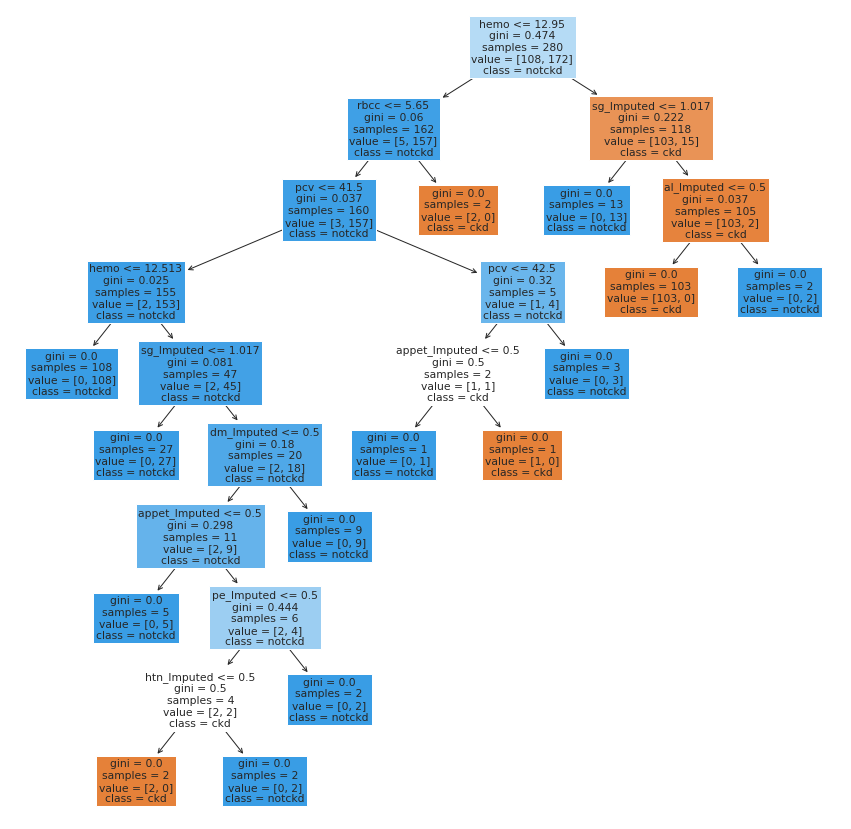

In [ ]:
#Decision Tree plot
from sklearn import tree 
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(salah_modelS, feature_names = list(x1.columns[rfecv.support_]), class_names =["ckd","notckd"], filled=True)

ADABOOST

In [ ]:
from numpy.ma.core import shape
from sklearn.ensemble import AdaBoostClassifier

svm = SVC(kernel='linear', probability = True)
ayoub_ada = AdaBoostClassifier(base_estimator = svm)
ayoub_ada.fit(X_train_scaled_selected, y_train)


# accuracy score, confusion matrix and classification report of ada boost

ada_acc1 = accuracy_score(y_test, ayoub_ada.predict(X_test_scaled_selected)) 

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ayoub_ada.predict(X_train_scaled_selected))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc1} \n")

print(f"Confusion Matrix :- \n{metrics.confusion_matrix(y_test, ayoub_ada.predict(X_test_scaled_selected))}\n")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[42  0]
 [ 2 76]]



Fit function 

In [ ]:
def fit(self, X, y, sample_weight):
  #self._validate_params()
  self.sample_weight=sample_weight
  self.X=X
  return self._fit(X, y)

In [ ]:
setattr(KNeighborsClassifier,'fit', fit)
KNeighborsClassifier.__dict__["fit"]

<function __main__.fit(self, X, y, sample_weight)>

Predict function

In [ ]:
def predict(self, X):

        y_pred = []

        # Iterate over the samples in X
        for x in X:
            # Calculate the distances between x and the training samples
            distances = np.sqrt(np.sum((self.X - x) ** 2, axis=1))

            # Sort the samples by distance and get the indices of the k-nearest neighbors
            k_neighbors = np.argsort(distances)[:self.n_neighbors]

            # Get the labels of the k-nearest neighbors
            k_neighbor_labels = self.y[k_neighbors]

            # Calculate the weighted average of the labels using the sample weights
            if self.sample_weight is not None:
            
                weights = self.sample_weight[k_neighbors]

                weighted_average = np.average(k_neighbor_labels, weights=weights)
                y_pred.append(weighted_average)
            else:
                weighted_average = np.mean(k_neighbor_labels)

                # Append the predicted label for x to the list of predictions
                y_pred.append(weighted_average)

        # Return the list of predictions
        return np.array(y_pred)

In [ ]:
setattr(KNeighborsClassifier,'predict',predict)
KNeighborsClassifier.__dict__["predict"]

<function __main__.predict(self, X)>

Predict_proba function

In [ ]:
def predict_proba(self, X):
        y_proba = []

        # # Iterate over the samples in X
        for x in X:
            #     # Calculate the distances between x and the training samples
            distances = np.sqrt(np.sum((self.X - x) ** 2, axis=1))

            # Sort the samples by distance and get the indices of the k-nearest neighbors
            k_neighbors = np.argsort(distances)[:self.n_neighbors]

            # Get the labels of the k-nearest neighbors
            k_neighbor_labels = self._y[k_neighbors]
            sample_weight = self.sample_weight
            # Calculate the weighted average of the probabilities of the labels using the sample weights
            weighted_average = np.mean(k_neighbor_labels)
            if sample_weight is not None:
                 #class_weights = [0.5  if i==0 else 2 for i in y_train ]
                 #weights[weights == 0] = 0.1
                 weights = sample_weight[k_neighbors]
                 #print(weights)
                 # Replace any zero weights with a small non-zero value
                 weights[weights == 0] = 0.1
                 weighted_average = np.average(k_neighbor_labels, weights=weights)
            else:
                 weighted_average = np.mean(k_neighbor_labels)
            y_proba.append([1 - weighted_average, weighted_average])

            
        # Return the list of predicted probabilities
        return np.array(y_proba)

In [ ]:
setattr(KNeighborsClassifier,'predict_proba',predict_proba)
KNeighborsClassifier.__dict__["predict_proba"]

<function __main__.predict_proba(self, X)>

Accuracy: 0.9916666666666667
Confusion Matrix :- 
[[42  0]
 [ 1 77]]



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


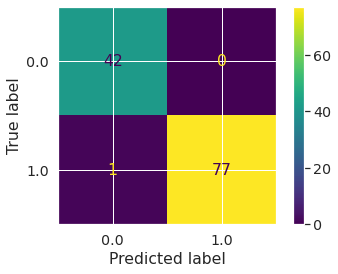

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
# Create an AdaBoost classifier
ada =AdaBoostClassifier(base_estimator=knn, learning_rate=1,algorithm='SAMME.R')
# Fit the classifier to the training data
ada.fit(X_train_scaled_selected,y_train)
# Make predictions on the test set
y_pred = ada.predict(X_test_scaled_selected)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(f"Confusion Matrix :- \n{metrics.confusion_matrix(y_test,ada.predict(X_test_scaled_selected))}\n")
plot_confusion_matrix(ada, X_test_scaled_selected, y_test)

In [ ]:
salah_ada = AdaBoostClassifier(base_estimator = salah_modelS)
salah_ada.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc3 = accuracy_score(y_test, salah_ada.predict(X_test_selected))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, salah_ada.predict(X_train_selected))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc3} \n")

print(f"Confusion Matrix :- \n{metrics.confusion_matrix(y_test, salah_ada.predict(X_test_selected))}\n")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[42  0]
 [ 1 77]]



In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 10,random_state=42)

karim_ada = AdaBoostClassifier(base_estimator = rfc)
karim_ada.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc4 = accuracy_score(y_test, karim_ada.predict(X_test_selected))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, karim_ada.predict(X_train_selected))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc4} \n")

print(f"Confusion Matrix :- \n{metrics.confusion_matrix(y_test, karim_ada.predict(X_test_selected))}\n")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 1.0 

Confusion Matrix :- 
[[42  0]
 [ 0 78]]



In [ ]:
print(f"Classification Report :\n\033[1;31mSVM\033[\n {classification_report(y_test, ayoub_ada.predict(X_test_scaled_selected))}")
print(f"\033[1;31mDecision Tree\033[\n {classification_report(y_test, y_pred)}")
print(f"\033[1;31mDecision Tree\033[\n {classification_report(y_test, salah_ada.predict(X_test_selected))}")
print(f"\033[1;31mRandom Forest\033[\n {classification_report(y_test, karim_ada.predict(X_test_selected))}")

Classification Report :
SVM[
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        42
         1.0       1.00      0.97      0.99        78

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

Decision Tree[
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        42
         1.0       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Decision Tree[
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        42
         1.0       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted 